### K-means and self-organizing maps

1. Generate a multivariate dataset $X$ with 100 elements and two dimensions.
2. Implement online k-means algorithm and plot detected cluster centers along with your dataset.
3. Augment your implementation with the self organizing map (SOM) approach and plot detected cluster centers along with your dataset.

--------------------------------------------------------------------
**Online k-means algorithm**:
- initialize $\mathbf{m}_i, \ i=1,...,k$, for example, to $k$ random $\mathbf{x}^t$
- repeat
    - for all $\mathbf{x}^t \in \mathcal{X}$ in random order
         - $i \leftarrow arg\ min_j \|\mathbf{x}^t - \mathbf{m}_j\|$
         - $\mathbf{m}_i \leftarrow \mathbf{m}_i + \eta (\mathbf{x}^t - \mathbf{m}_j)$
- until $\mathbf{m}_i$ converge

### Solution

#### Data generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(37)

In [2]:
#here the data is pre-clustered to show understanding
#it is expected that you will adjust this data

#cluster 1 
x1_1= np.round(np.random.uniform(0,1,30),2)
x2_1 = np.round(np.random.uniform(0,1,30),2)

x1 = np.column_stack((x1_1,x2_1)) 

#cluster 2 
x1_2= np.round(np.random.uniform(3,4,40),2)
x2_2 = np.round(np.random.uniform(3,4,40),2)

x2 = np.column_stack((x1_2,x2_2))

#cluster 1 
x1_3 = np.round(np.random.uniform(7,8,30),2)
x2_3 = np.round(np.random.uniform(7,8,30),2)

x3 = np.column_stack((x1_3,x2_3))

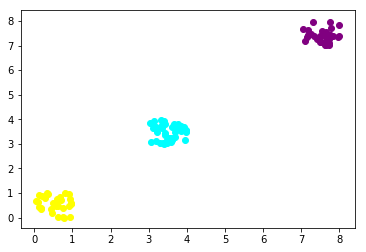

In [3]:
plt.scatter(x1[:,0], x1[:,1], c='yellow')
plt.scatter(x2[:,0], x2[:,1], c='cyan')
plt.scatter(x3[:,0], x3[:,1], c='purple')
plt.show()

In [5]:
X =  np.concatenate((x1, x2,x3), axis=0)
X.shape[1]

2

#### k-means

In [6]:
# online k means
#this implementation doesn't check for convergence directly, but instead works on the assumption that after enough iterations
#convergence occurs

#you can adapt it at the end to do a basic difference check instead to be more efficient

def online_kmeans(x,k,step_size,iterations):
    dim_vals = x.shape
    m_vals = np.zeros([k,dim_vals[1]])
    
    for center in range(k):
        index = np.random.randint(0,len(x))
        m_vals[center] = x[index]

    for repeat in range(iterations):
        
        np.random.shuffle(x)
        
        for t in range(len(x)):
            i=0
            #using euclidean distance
            diff = np.sqrt((x[t][0] - m_vals[0][0])**2 +  (x[t][1] - m_vals[0][1])**2)

            #find the closest center
            for j in range(1,len(m_vals)):
                curr_diff = np.sqrt((x[t][0] - m_vals[j][0])**2 +  (x[t][1] - m_vals[j][1])**2)
                if  curr_diff < diff:
                    i = j
                    diff = curr_diff

            m_vals[i] = m_vals[i] + step_size*(x[t]-m_vals[i])
    return m_vals

In [7]:
m_vals = online_kmeans(X,3,0.05,1000)
m_vals

array([[3.54622078, 3.47826436],
       [7.55305344, 7.37642754],
       [0.53557212, 0.53395802]])

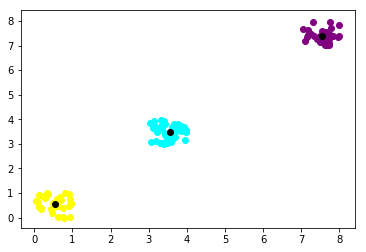

In [8]:
plt.scatter(x1[:,0], x1[:,1], c='yellow')
plt.scatter(x2[:,0], x2[:,1], c='cyan')
plt.scatter(x3[:,0], x3[:,1], c='purple')
plt.scatter(m_vals[:,0],m_vals[:,1],c='black')
plt.show()

#### SOM implementation

In [9]:
# SOM
def calc_var(m_vals,median):
    sigma = 0 
    N = len(m_vals)
    for m in m_vals:
        euclidean_distance = np.sqrt((m[0] - median[0])**2 +  (m[1] - median[1])**2)
        sigma = sigma + (euclidean_distance)**2
    sigma = sigma/N
    return(np.sqrt(sigma))

def nh_function(sigma,l,i):
    exp_term = (-(l-i)**2)/(2*sigma**2)
    output = (1/np.sqrt(2*np.pi)*sigma)*np.exp(exp_term)
    return(output)
    
def online_kmeans_som(x,step_size,k,nh_size,iterations):
    
    dim_vals = x.shape
    m_vals = np.zeros([k,dim_vals[1]])
    
    for center in range(k):
        index = np.random.randint(0,len(x))
        m_vals[center] = x[index]
    
    for repeat in range(iterations):
        
        np.random.shuffle(x)
        
        for t in range(len(x)):
            i=0
            diff = np.sqrt((x[t][0] - m_vals[0][0])**2 +  (x[t][1] - m_vals[0][1])**2)

            #find the closest center
            for j in range(1,len(m_vals)):
                curr_diff = np.sqrt((x[t][0] - m_vals[j][0])**2 +  (x[t][1] - m_vals[j][1])**2)
                if  curr_diff < diff:
                    i = j
                    diff = curr_diff
                    
            neighbors = m_vals[max(i-nh_size,1):min(i+nh_size,len(m_vals))]
            
            if (neighbors == m_vals[i]).all():
                m_vals[i] = m_vals[i] + step_size*(x[t]-m_vals[i])
                
            else:
                sigma = calc_var(neighbors,m_vals[i])
                for nh_index in range(max(i-nh_size,1),min(i+nh_size,len(m_vals))):
                    nh_func_res = nh_function(sigma,nh_index,i)
                    m_vals[nh_index] = m_vals[nh_index] + step_size*nh_func_res*(x[t]-m_vals[nh_index])
    
    return m_vals

In [10]:
m_vals = online_kmeans_som(X,0.05,3,2,300)
m_vals

array([[7.72      , 7.28      ],
       [4.05049899, 4.05143179],
       [2.08627192, 2.07536498]])

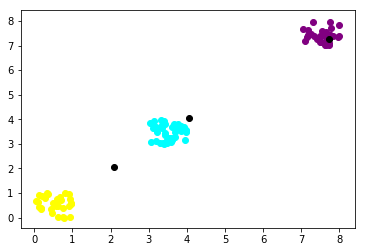

In [11]:
plt.scatter(x1[:,0], x1[:,1], c='yellow')
plt.scatter(x2[:,0], x2[:,1], c='cyan')
plt.scatter(x3[:,0], x3[:,1], c='purple')
plt.scatter(m_vals[:,0],m_vals[:,1],c='black')
plt.show()